In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from pickle import dump
from pickle import load

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from numpy import set_printoptions
pd.set_option('display.width', 100)
pd.set_option('precision', 5)

%matplotlib inline

In [2]:
# Load dataset
filename = 'Copy of sonar data.csv'
df = pd.read_csv(filename, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.sample(12)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
114,0.0114,0.0222,0.0269,0.0384,0.1217,0.2062,0.1489,0.0929,0.1350,0.1799,...,0.0269,0.0152,0.0257,0.0097,0.0041,0.0050,0.0145,0.0103,0.0025,M
47,0.0373,0.0281,0.0232,0.0225,0.0179,0.0733,0.0841,0.1031,0.0993,0.0802,...,0.0008,0.0045,0.0024,0.0006,0.0073,0.0096,0.0054,0.0085,0.0060,R
84,0.0378,0.0318,0.0423,0.0350,0.1787,0.1635,0.0887,0.0817,0.1779,0.2053,...,0.0046,0.0044,0.0078,0.0102,0.0065,0.0061,0.0062,0.0043,0.0053,R
189,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,...,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021,M
121,0.0162,0.0041,0.0239,0.0441,0.0630,0.0921,0.1368,0.1078,0.1552,0.1779,...,0.0173,0.0135,0.0114,0.0062,0.0157,0.0088,0.0036,0.0053,0.0030,M
16,0.0352,0.0116,0.0191,0.0469,0.0737,0.1185,0.1683,0.1541,0.1466,0.2912,...,0.0346,0.0158,0.0154,0.0109,0.0048,0.0095,0.0015,0.0073,0.0067,R
17,0.0192,0.0607,0.0378,0.0774,0.1388,0.0809,0.0568,0.0219,0.1037,0.1186,...,0.0331,0.0131,0.0120,0.0108,0.0024,0.0045,0.0037,0.0112,0.0075,R
138,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057,M
77,0.0336,0.0294,0.0476,0.0539,0.0794,0.0804,0.1136,0.1228,0.1235,0.0842,...,0.0150,0.0111,0.0032,0.0035,0.0169,0.0137,0.0015,0.0069,0.0051,R
13,0.0090,0.0062,0.0253,0.0489,0.1197,0.1589,0.1392,0.0987,0.0955,0.1895,...,0.0059,0.0095,0.0194,0.0080,0.0152,0.0158,0.0053,0.0189,0.0102,R


In [8]:
df.isnull().values.any()

False

In [14]:
df.isnull().values.any()

False

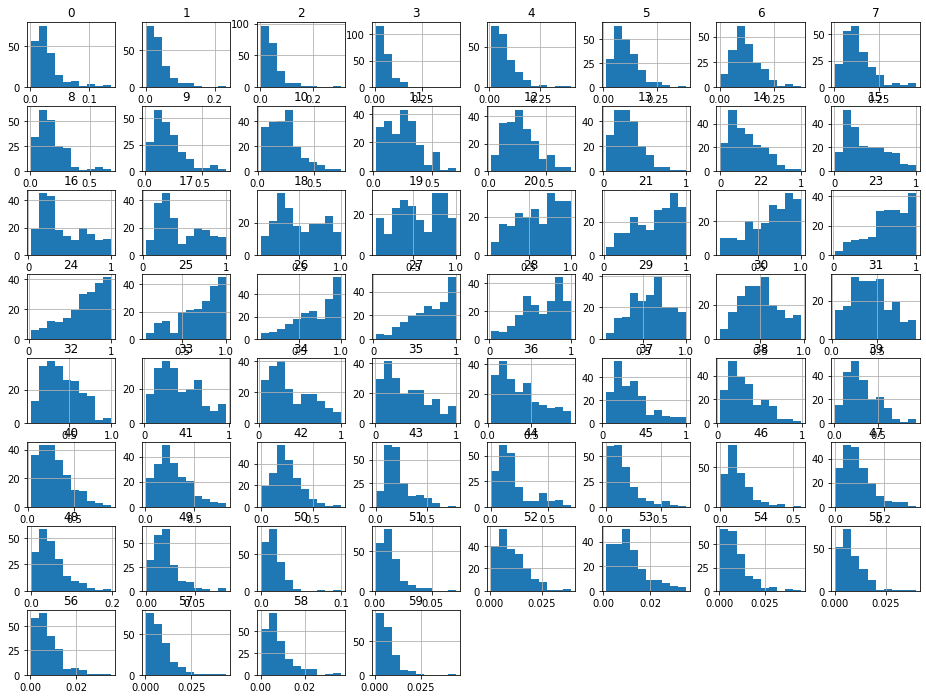

In [18]:
# Histograms
df.hist(figsize=(16,12));

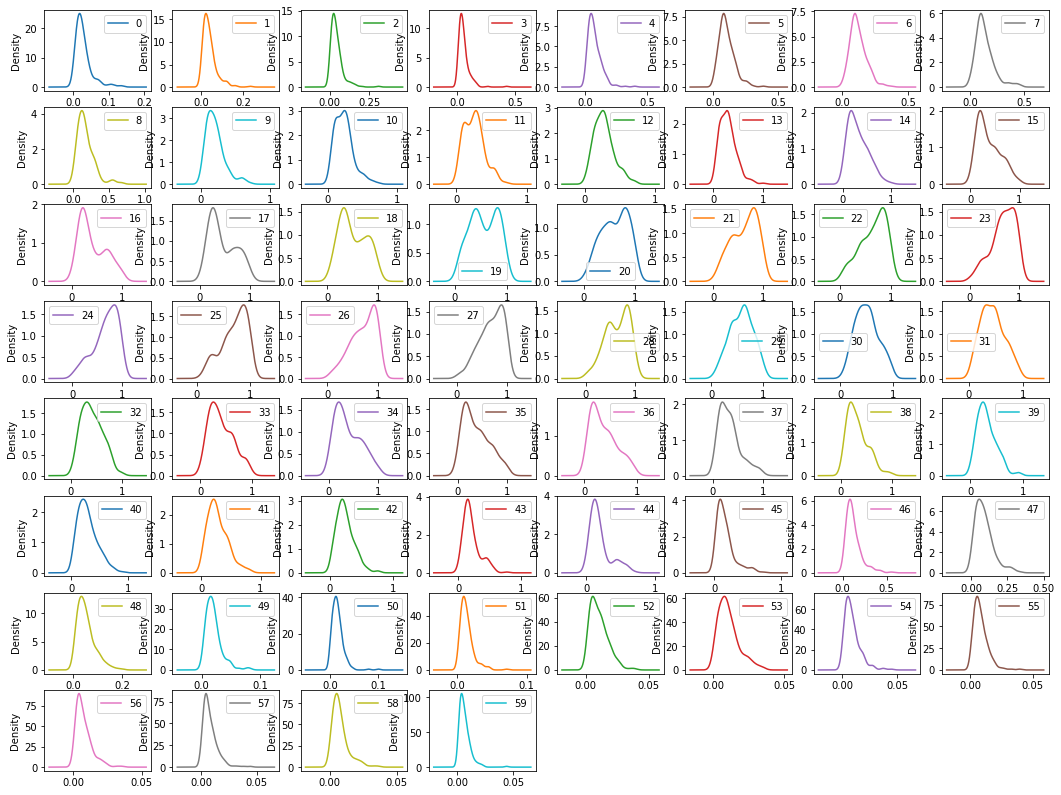

In [19]:
# Density plots
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, figsize=(18, 14));

In [20]:
correlations = df.corr()

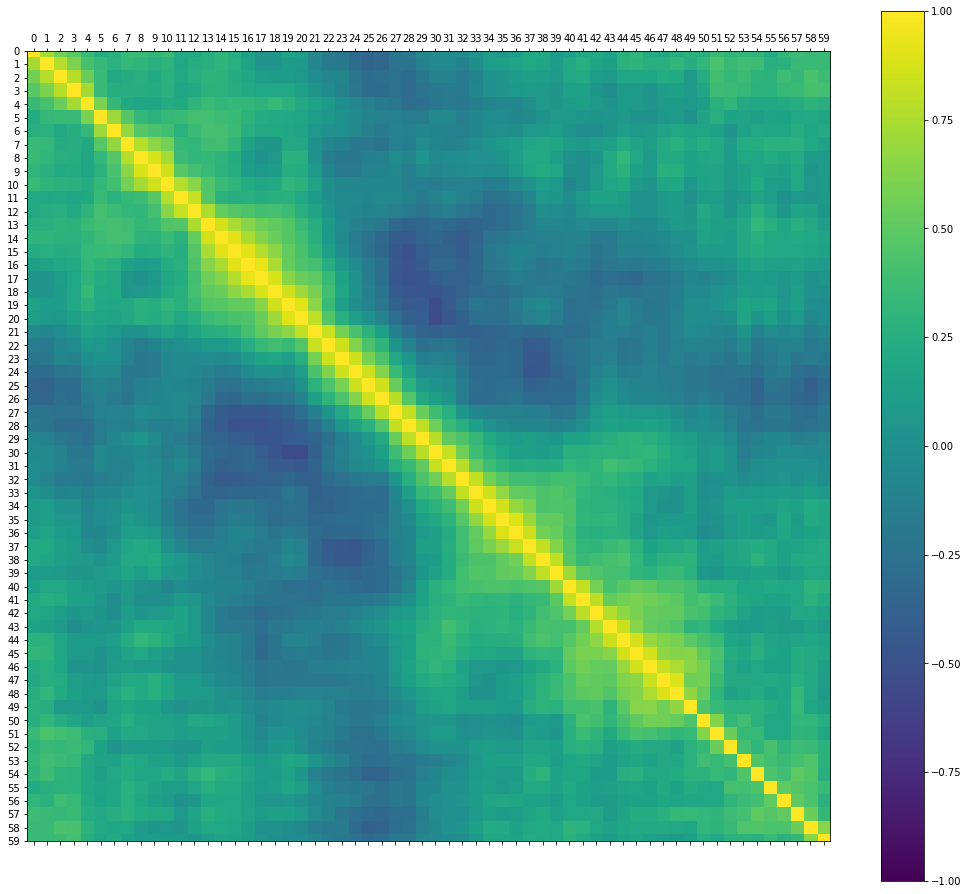

In [22]:
# Plot correlation matrix
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 60, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [23]:
arr = df.values

In [29]:
X = arr[:,0:60]
y = arr[:,60]


In [30]:
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

LR: 76.94852941176471 (10.05102950966478)
LDA: 74.63235294117648 (11.785367885381074)
KNN: 80.80882352941175 (6.750704820308338)
CART: 72.97794117647058 (8.74389616565232)
NB: 64.88970588235294 (14.18684214516758)
SVM: 77.64705882352942 (9.041128152498237)


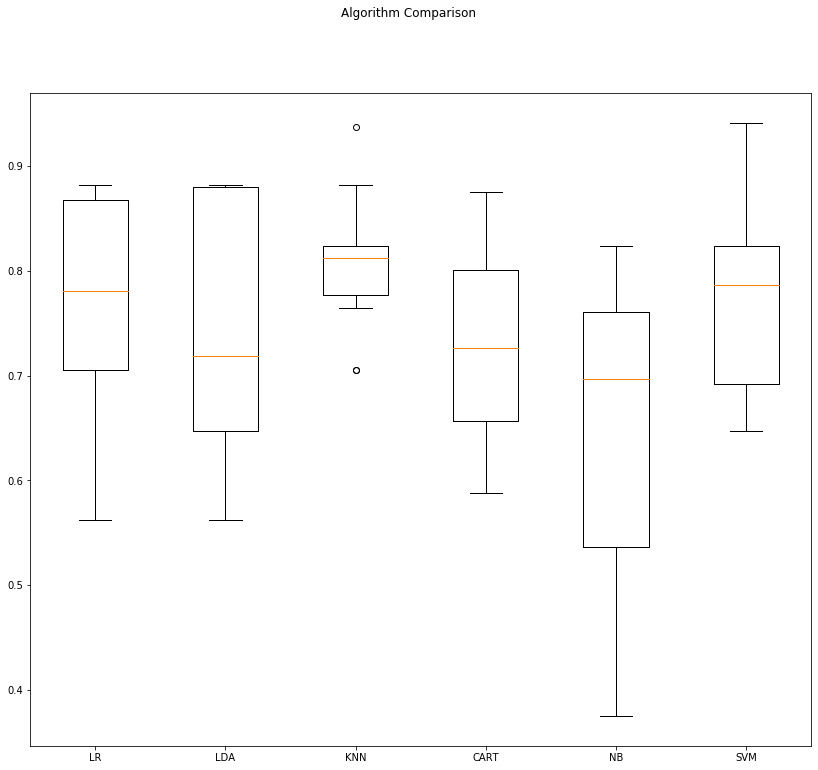

In [42]:
# The baseline

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
def eval_algorithms(models, show_boxplots=True):
    # Evaluate each model in turn
    # Setup the test harness to use 10-fold cross validation
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("Estimated accuracy of {} with the mean of {} and std. dev. {}".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        print("{}: {} ({})".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        
    if show_boxplots:
        # Create a plot of the model evaluation results to compae the spread 
        # and the estimated mean accuracy of each model
        fig = plt.figure(figsize=(14,12)) 
        fig.suptitle('Algorithm Comparison') 
        ax = fig.add_subplot(111) 
        plt.boxplot(results) 
        ax.set_xticklabels(names) 
        plt.show()
        
eval_algorithms(models)

ScaledLR: 74.04411764705883 (9.466751140841813)
scaledLDA: 74.63235294117648 (11.785367885381074)
scaledKNN: 82.57352941176471 (5.451103821426657)
ScaledCART: 69.26470588235294 (9.516592230502516)
ScaledNB: 64.88970588235294 (14.18684214516758)
ScaledSVM: 83.63970588235293 (8.869747214968386)


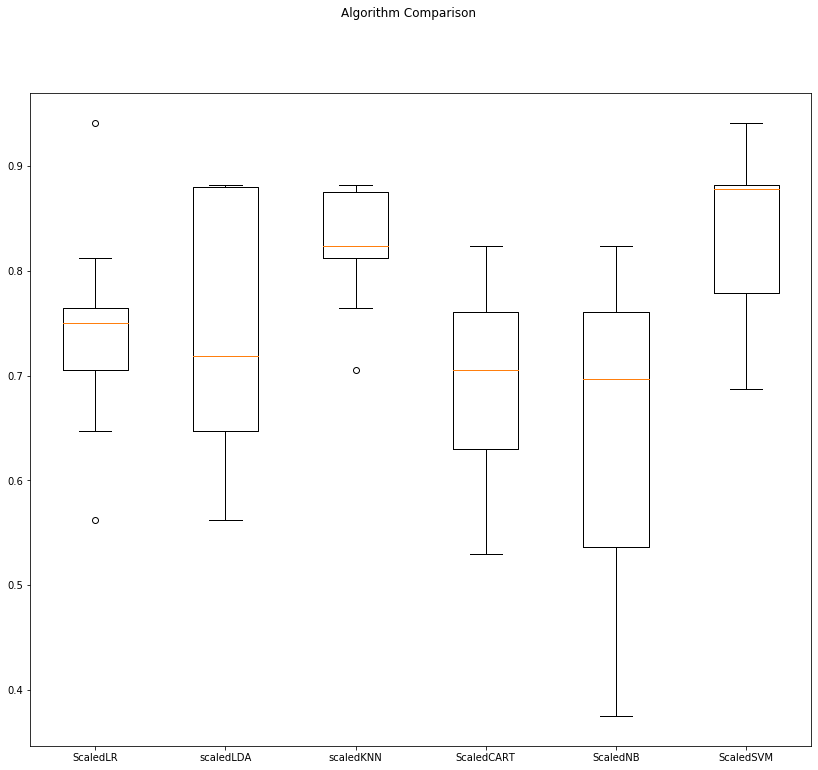

In [52]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),
                                        ('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr'))])))
pipelines.append(('scaledLDA', Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('scaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='scale'))])))
eval_algorithms(pipelines)

In [75]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kflod = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kflod, iid=False)
grid_result=grid.fit(rescaledX,Y_train)
# Print results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for means,stds,params in zip(means,stds,params):
    
    
    print("{} ({}) with:{}".format(means,stds,params))

Best: 0.85 using {'n_neighbors': 1}
Best: 0.85 using {'n_neighbors': 1}
0.85 (0.05968577609876672) with:{'n_neighbors': 1}
0.8371323529411765 (0.06601389343386418) with:{'n_neighbors': 3}
0.8375 (0.03737725007982011) with:{'n_neighbors': 5}
0.7639705882352941 (0.0893737825672642) with:{'n_neighbors': 7}
0.7514705882352941 (0.08705087404087493) with:{'n_neighbors': 9}
0.7334558823529411 (0.104830998652816) with:{'n_neighbors': 11}
0.7330882352941176 (0.10580573208090603) with:{'n_neighbors': 13}
0.7279411764705882 (0.07614821756326462) with:{'n_neighbors': 15}
0.7099264705882353 (0.07928656388570995) with:{'n_neighbors': 17}
0.7220588235294118 (0.08508785913176035) with:{'n_neighbors': 19}
0.7102941176470587 (0.10950452661639593) with:{'n_neighbors': 21}
